In [37]:
import sys
from torch.utils.data import DataLoader, Subset
sys.path.append('../data/cifar100/')  
from cifar100_loader import load_cifar100
from models.model import LeNet5 #import the model

In [38]:

DEVICE = 'cuda' # 'cuda' or 'cpu'

BATCH_SIZE = 128    # Higher batch sizes allows for larger learning rates. An empirical heuristic suggests that, when changing
                     # the batch size, learning rate should change by the same factor to have comparable results

LR = 1e-3            # The initial Learning Rate
MOMENTUM = 0.9       # Hyperparameter for SGD, keep this at 0.9 when using SGD
WEIGHT_DECAY = 5e-5  # Regularization, you can keep this at the default

NUM_EPOCHS = 30      # Total number of training epochs (iterations over dataset)
STEP_SIZE = 20       # How many epochs before decreasing learning rate (if using a step-down policy)
GAMMA = 0.1          # Multiplicative factor for learning rate step-down

LOG_FREQUENCY = 10

In [44]:
#25% of the dataset kept for validation
trainloader, validloader, testloader = load_cifar100(batch_size=32, validation_split=0.25)

Files already downloaded and verified
Files already downloaded and verified


Training set class distribution:


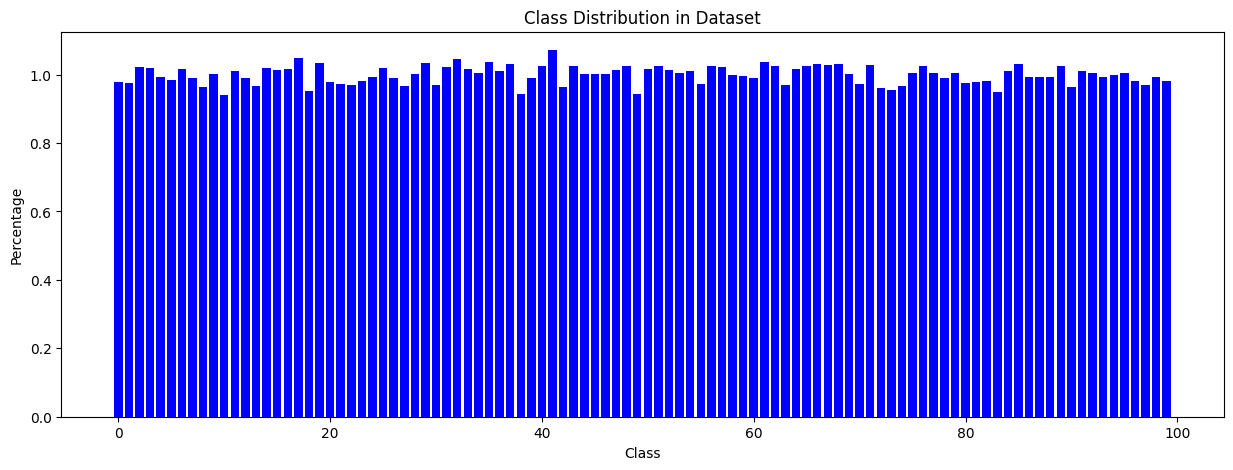


Validation set class distribution:


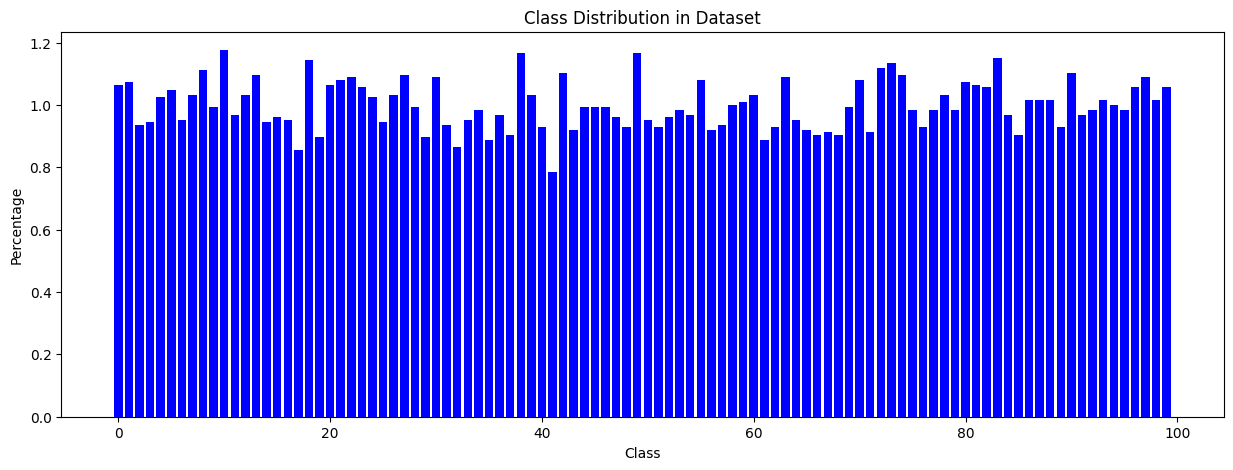

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from torch.utils.data import Subset

def analyze_class_distribution(dataset):
    if isinstance(dataset, Subset):
        labels = [dataset.dataset.targets[i] for i in dataset.indices]
    else:
        labels = dataset.targets
    
    label_count = Counter(labels)
    total_labels = sum(label_count.values())
    
    # Per plottare
    classes = list(label_count.keys())
    counts = [label_count[key] for key in classes]
    percentages = [count / total_labels * 100 for count in counts]

    plt.figure(figsize=(15, 5))
    plt.bar(classes, percentages, color='blue')
    plt.xlabel('Class')
    plt.ylabel('Percentage')
    plt.title('Class Distribution in Dataset')
    plt.show()

# Esegui questa funzione sui tuoi dataset
print("Training set class distribution:")
analyze_class_distribution(trainloader.dataset)

print("\nValidation set class distribution:")
analyze_class_distribution(validloader.dataset)
#More variability in the validation set because of the reduced number of samples wrt the training set
#Increasing the validation set size, the distribution is approximately the same among classes


In [46]:
print("Dimension of the training dataset:", len(trainloader.dataset))
print("Dimension of the validation dataset:", len(validloader.dataset))
print("Dimension of the test dataset:", len(testloader.dataset))

Dimension of the training dataset: 37500
Dimension of the validation dataset: 12500
Dimension of the test dataset: 10000


In [43]:
import torch
import torch.optim as optim
import torch.nn as nn

model = LeNet5().to(DEVICE) # Create the model

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LR, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)

# Training loop
for epoch in range(NUM_EPOCHS): 
    for data, targets in trainloader:
        data = data.to(DEVICE)        # Move the data to the GPU
        targets = targets.to(DEVICE)  # Move the targets to the GPU

        optimizer.zero_grad()         # Zero the gradients
        outputs = model(data)         # Pass data through the model
        loss = criterion(outputs, targets)  # Compute loss
        loss.backward()               # Backpropagation
        optimizer.step()              # Update model parameters

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 4.6051788330078125
Epoch 2, Loss: 4.605328559875488


KeyboardInterrupt: 